In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("task4-dataset.csv")

# Check missing values
print(df.isnull().sum())
print(df.dtypes)
print(df.head())


Unnamed: 0                   0
semester                     0
gender                       0
height                     170
age                          0
study                        0
likes_pinapple_on_pizza    246
likes_chocolate              0
english_skills             177
books_per_year               0
dtype: int64
Unnamed: 0                   int64
semester                   float64
gender                     float64
height                     float64
age                        float64
study                      float64
likes_pinapple_on_pizza    float64
likes_chocolate             object
english_skills             float64
books_per_year             float64
dtype: object
   Unnamed: 0  semester  gender  height   age  study  likes_pinapple_on_pizza  \
0           0      99.0     0.0     NaN  27.0    2.0                      1.0   
1           1      28.0     0.0   175.0  34.0    3.0                      1.0   
2           2      -1.0     0.0     NaN  22.0    4.0                  

In [2]:
df['likes_chocolate'] = pd.to_numeric(df['likes_chocolate'], errors='coerce')

In [3]:
means_before = df[['height', 'likes_pinapple_on_pizza', 'english_skills', 'likes_chocolate']].mean()
print("Means before strategy:")
print(means_before)

Means before strategy:
height                     172.161446
likes_pinapple_on_pizza      0.360743
english_skills              87.009721
likes_chocolate              0.790977
dtype: float64


In [4]:
df_filled = df.copy()

# Impute strategies
df_filled['height'].fillna(df['height'].median(), inplace=True)
df_filled['likes_pinapple_on_pizza'].fillna(df['likes_pinapple_on_pizza'].mode()[0], inplace=True)
df_filled['english_skills'].fillna(df['english_skills'].mean(), inplace=True)
df_filled['likes_chocolate'].fillna(df['likes_chocolate'].mode()[0], inplace=True)


C:\Users\tring\AppData\Local\Temp\ipykernel_24484\777735055.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['height'].fillna(df['height'].median(), inplace=True)
C:\Users\tring\AppData\Local\Temp\ipykernel_24484\777735055.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [5]:
means_after = df_filled[['height', 'likes_pinapple_on_pizza', 'english_skills', 'likes_chocolate']].mean()
print("Means after strategy:")
print(means_after)

Means after strategy:
height                     172.304000
likes_pinapple_on_pizza      0.272000
english_skills              87.009721
likes_chocolate              0.861000
dtype: float64


In [6]:
comparison = pd.DataFrame({
    "Before Strategy": means_before,
    "After Strategy": means_after
})
print(comparison)

                         Before Strategy  After Strategy
height                        172.161446      172.304000
likes_pinapple_on_pizza         0.360743        0.272000
english_skills                 87.009721       87.009721
likes_chocolate                 0.790977        0.861000


In [7]:
correlations = df.corr(numeric_only=True)
print(correlations)

                         Unnamed: 0  semester    gender    height       age  \
Unnamed: 0                 1.000000  0.008971  0.005783 -0.002468 -0.007535   
semester                   0.008971  1.000000 -0.027287  0.012015  0.417283   
gender                     0.005783 -0.027287  1.000000 -0.578430  0.068179   
height                    -0.002468  0.012015 -0.578430  1.000000 -0.007906   
age                       -0.007535  0.417283  0.068179 -0.007906  1.000000   
study                     -0.005458  0.011213  0.015172  0.017199 -0.053409   
likes_pinapple_on_pizza    0.006937 -0.040761 -0.086979  0.064164 -0.076052   
likes_chocolate            0.036805  0.028186  0.022417 -0.017029 -0.011547   
english_skills            -0.022495  0.018383 -0.031931 -0.038749 -0.010805   
books_per_year            -0.020783 -0.025873 -0.010118 -0.052816 -0.022224   

                            study  likes_pinapple_on_pizza  likes_chocolate  \
Unnamed: 0              -0.005458                 0

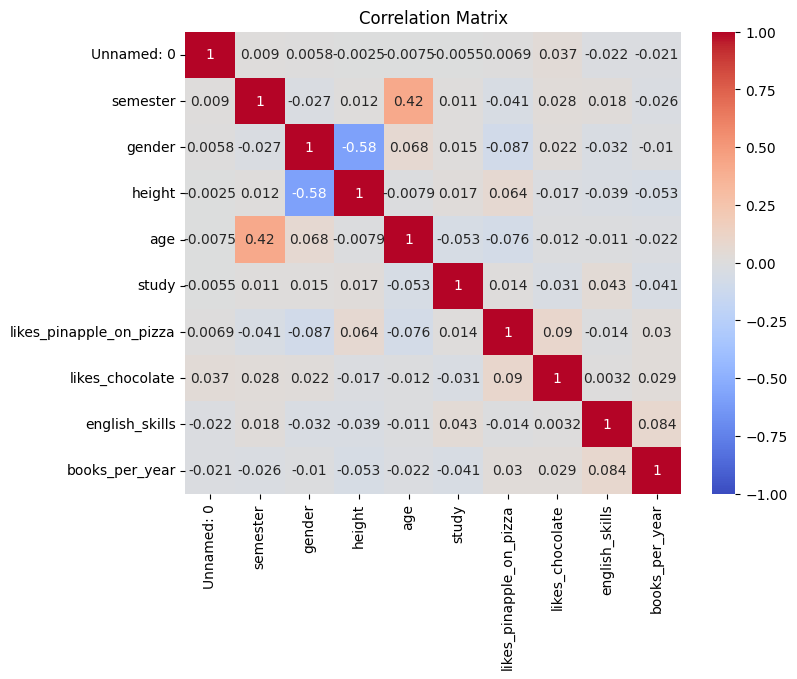

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()